# Figures
Visualize the results of the analyses for the indices paper

In [1]:
import os
import pickle as pkl
import string
import sys
from glob import glob

import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import svgutils.transform as sg
import umap
from plotnine import *
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from svgutils.compose import SVG, Figure, Panel, Text
from tqdm import tqdm

sys.path.append('../indices')
from utils import load_percentile_data, load_journal_data, load_single_heading, parse_metadata

In [3]:
headings = [('nanotechnology', 'microscopy'), ('immunochemistry', 'anatomy'), 
            ('proteomics', 'metabolomics'), ('computational_biology', 'human_genetics')]

In [ ]:
for heading1, heading2 in headings:
    percentile_data = load_percentile_data(heading1, heading2, base_dir='../viz_dataframes')
    
    hist_data = percentile_data.melt(id_vars='doi', value_vars=[f'{heading1}_pagerank', f'{heading2}_pagerank'],
                                     value_name='PageRank',)
    
    h1 = string.capwords(heading1.replace('_', ' '))
    h2 = string.capwords(heading2.replace('_', ' '))
    
    new_names = {f'{heading1}_pagerank': f'{h1}',
                 f'{heading2}_pagerank': f'{h2}'}
    
    hist_data['Field'] = hist_data['variable'].map(new_names)
        
    plot = ggplot(hist_data, aes(x='PageRank', fill='Field'))
    plot += geom_histogram(position='identity', alpha=.7)
    plot += scale_x_log10()
    plot += scale_y_continuous(name='Count')
    plot += ggtitle(f'{h1} and {h2} Pagerank Distribution')
    plot += theme_classic()
    ggsave(plot, f'../figures/{heading1}-{heading2}-hist.svg')

    plot = ggplot(percentile_data, aes(x=f'{heading1}_pagerank', y=f'{heading2}_pagerank',))
    plot += geom_bin2d()
    plot += scale_x_log10(name=f'{h1} Pagerank')
    plot += scale_y_log10(name=f'{h2} Pagerank')
    plot += ggtitle(f'{h1} vs {h2} Pageranks')
    plot += scale_fill_gradient(trans='log')
    plot += theme_classic()

    ggsave(plot, f'../figures/{heading1}-{heading2}-heatmap.svg')
    
    plot = ggplot(percentile_data, aes(x=f'{heading1}_pagerank', y=f'{heading2}_pagerank', 
              color=f'{heading1}-{heading2}'))
    plot += geom_point()
    plot += scale_x_log10(name=f'{h1} Pagerank')
    plot += scale_y_log10(name=f'{h2} Pagerank')
    plot += ggtitle(f'{h1} and {h2} Percentile Scores')
    plot += scale_color_gradient2(low='purple', mid='#e2e2e2', high='green')
    plot += theme_classic()

    ggsave(plot, f'../figures/{heading1}-{heading2}-difference.svg')

## Combine histograms

In [48]:
plot1 = f'../figures/{headings[0][0]}-{headings[0][1]}-hist.svg'
plot2 = f'../figures/{headings[1][0]}-{headings[1][1]}-hist.svg'
plot3 = f'../figures/{headings[2][0]}-{headings[2][1]}-hist.svg'
plot4 = f'../figures/{headings[3][0]}-{headings[3][1]}-hist.svg'

y_2 = 310
x_2 = 520

fig = Figure("160cm", "160cm",
       Panel(
          SVG(plot1),
          Text("A", 0, 40, size=30),
          ),
       Panel(
          SVG(plot2).move(x_2, 0),
          Text("B", 20, 40, size=30).move(x_2-20, 0),
          ),
       Panel(
          SVG(plot3).move(0, y_2),
          Text("C", 0, 50, size=30).move(0, y_2),
          ),
       Panel(
          SVG(plot4).move(x_2, y_2),
          Text("D", 20, 50, size=30).move(x_2-20, y_2),
          )
       )
fig.save('../figures/combined_histogram.svg')

In [49]:
!inkscape --export-area-drawing -w 1060 -h 636 --export-png=../figures/combined_histogram.png ../figures/combined_histogram.svg -b "#ffffffff"

Background RRGGBBAA: ffffffff
Area -18.8976:-18082.4:41184.5:6066.14 exported to 1060 x 636 pixels (2.52835 dpi)
Bitmap saved as: ../figures/combined_histogram.png


## Combine heatmaps

In [ ]:
plot1 = f'../figures/{headings[0][0]}-{headings[0][1]}-heatmap.svg'
plot2 = f'../figures/{headings[1][0]}-{headings[1][1]}-heatmap.svg'
plot3 = f'../figures/{headings[2][0]}-{headings[2][1]}-heatmap.svg'
plot4 = f'../figures/{headings[3][0]}-{headings[3][1]}-heatmap.svg'

y_2 = 325
x_2 = 500

fig = Figure("1007", "656",
       Panel(
          SVG(plot1),
          Text("A", 25, 20, size=30),
          ),
       Panel(
          SVG(plot2).move(x_2, 0),
          Text("B", 25, 20, size=30).move(x_2-20, 0),
          ),
       Panel(
          SVG(plot3).move(0, y_2),
          Text("C", 25, 20, size=30).move(0, y_2),
          ),
       Panel(
          SVG(plot4).move(x_2, y_2),
          Text("D", 25, 20, size=30).move(x_2-20, y_2),
          )
       )
fig.save('../figures/combined_heatmap.svg')

In [ ]:
!inkscape --export-area-drawing -w 1007 -h 656 --export-png=../figures/combined_heatmap.png ../figures/combined_heatmap.svg -b "#ffffffff"

## Combine percentile plots

In [ ]:
plot1 = f'../figures/{headings[0][0]}-{headings[0][1]}-difference.svg'
plot2 = f'../figures/{headings[1][0]}-{headings[1][1]}-difference.svg'
plot3 = f'../figures/{headings[2][0]}-{headings[2][1]}-difference.svg'
plot4 = f'../figures/{headings[3][0]}-{headings[3][1]}-difference.svg'

y_2 = 325
x_2 = 550

fig = Figure("1007", "656",
       Panel(
          SVG(plot1),
          Text("A", 25, 20, size=30),
          ),
       Panel(
          SVG(plot2).move(x_2, 0),
          Text("B", 25, 20, size=30).move(x_2-20, 0),
          ),
       Panel(
          SVG(plot3).move(0, y_2),
          Text("C", 25, 20, size=30).move(0, y_2-25),
          ),
       Panel(
          SVG(plot4).move(x_2, y_2),
          Text("D", 25, 20, size=30).move(x_2-20, y_2-25),
          )
       )
fig.save('../figures/combined_difference.svg')

In [ ]:
# The SVG version is ~150MB due to all the plotted points; we'll convert to a PNG to allow fast loading
!inkscape --export-area-drawing -w 1007 -h 656 --export-png=../figures/combined_difference.png ../figures/combined_difference.svg -b "#ffffffff"

## Build journal plots

In [ ]:
with open('../viz_dataframes/journals/nanotechnology-microscopy.pkl', 'rb') as in_file:
    nanotech_df = pkl.load(in_file)
nanotech_df.head()
science_row = nanotech_df[nanotech_df['journal_title'] == 'Science']
science_x_loc = science_row['nanotechnology_pagerank']
science_y_loc = science_row['microscopy_pagerank']

In [ ]:
plot = ggplot(nanotech_df, aes(x='nanotechnology_pagerank', y='microscopy_pagerank'))
plot += geom_point()
plot += scale_x_log10()
plot += scale_y_log10()
plot += ggtitle('Common microscopy/nanotechnology journals')
plot += annotate('text', x=science_x_loc - 5e-5, y=science_y_loc, label='Science',)
plot += annotate('point', x=science_x_loc, y=science_y_loc, fill='red', size=2, color='red')
ggsave(plot, '../figures/microscopy_journals.svg')
plot

In [ ]:
with open('../viz_dataframes/journals/immunochemistry-anatomy.pkl', 'rb') as in_file:
    immunochem_df = pkl.load(in_file)
immunochem_df.head()
science_row = immunochem_df[immunochem_df['journal_title'] == 'Science']
science_x_loc = science_row['immunochemistry_pagerank']
science_y_loc = science_row['anatomy_pagerank']

In [ ]:
nature_row = immunochem_df[immunochem_df['journal_title'] == 'Nature']
nature_x_loc = nature_row['immunochemistry_pagerank']
nature_y_loc = nature_row['anatomy_pagerank']

In [ ]:
cell_row = immunochem_df[immunochem_df['journal_title'] == 'Cell']
cell_x_loc = cell_row['immunochemistry_pagerank']
cell_y_loc = cell_row['anatomy_pagerank']

In [ ]:
plot = ggplot(immunochem_df, aes(x='immunochemistry_pagerank', y='anatomy_pagerank'))
plot += geom_point()
plot += scale_x_log10()
plot += scale_y_log10()
plot += ggtitle('Common immunochemistry/anatomy journals')
plot += annotate('text', x=science_x_loc - 1.9e-6, y=science_y_loc, label='Science',)
plot += annotate('point', x=science_x_loc, y=science_y_loc, fill='red', size=2, color='red')
plot += annotate('text', x=nature_x_loc - 2.7e-6, y=nature_y_loc, label='Nature',)
plot += annotate('point', x=nature_x_loc, y=nature_y_loc, fill='red', size=2, color='red')
plot += annotate('text', x=cell_x_loc - 1.6e-6, y=cell_y_loc, label='Cell',)
plot += annotate('point', x=cell_x_loc, y=cell_y_loc, fill='red', size=2, color='red')
ggsave(plot, '../figures/immunochemistry_journals.svg')
plot

## Combine journal plots

In [ ]:
plot1 = f'../figures/microscopy_journals.svg'
plot2 = f'../figures/immunochemistry_journals.svg'

y_2 = 325
x_2 = 415

fig = Figure("828", "331",
       Panel(
          SVG(plot1),
          Text("A", 25, 20, size=30),
          ),
       Panel(
          SVG(plot2).move(x_2, 0),
          Text("B", 25, 20, size=30).move(x_2-20, 0),
          ),
       )
fig.save('../figures/combined_journals.svg')

In [ ]:
# The SVG version is ~150MB due to all the plotted points; we'll convert to a PNG to allow fast loading
!inkscape --export-area-drawing -w 828 -h 331 --export-png=../figures/combined_journals.png ../figures/combined_journals.svg -b "#ffffffff"

## Create per-field distribution plots

In [67]:
for heading1, heading2 in headings:
    with open(f'../output/{heading1}-{heading2}-pagerank.pkl', 'rb') as in_file:
        h1_dict = pkl.load(in_file)
        h1_df = pd.DataFrame.from_dict(h1_dict, orient='index', columns=['pagerank'])
    with open(f'../output/{heading2}-{heading1}-pagerank.pkl', 'rb') as in_file:
        h2_dict = pkl.load(in_file)
        h2_df = pd.DataFrame.from_dict(h2_dict, orient='index', columns=['pagerank'])
    
    h1_text = string.capwords(heading1.replace('_', ' '))
    h2_text = string.capwords(heading2.replace('_', ' '))
    
    plot = ggplot(h1_df, aes(x='pagerank'))
    plot += geom_histogram()
    plot += ggtitle(f'{h1_text} PageRank Distribution')
    plot += scale_x_log10(name='PageRank')
    plot += scale_y_continuous(name='Count')
    plot += theme_classic()
    ggsave(plot, f'../figures/{heading1}-hist.svg')
    
    plot = ggplot(h2_df, aes(x='pagerank'))
    plot += geom_histogram()
    plot += ggtitle(f'{h2_text} PageRank Distribution')
    plot += scale_x_log10(name='PageRank')
    plot += scale_y_continuous(name='Count')
    plot += theme_classic()
    ggsave(plot, f'../figures/{heading2}-hist.svg')
    

                                pagerank
10.1021/la4040722               0.000016
10.1021/la804132z               0.000015
10.1021/acs.est.5b00904         0.000010
10.1038/nmat1194                0.000020
10.1088/0957-4484/25/33/335102  0.000010
...                                  ...
10.1109/tnb.2006.880834         0.000010
10.1021/am1010699               0.000012
10.1016/s0014-5793(03)01400-5   0.000023
10.1016/j.ejpb.2021.02.010      0.000010
10.1038/s41593-020-0704-9       0.000010

[36609 rows x 1 columns]


/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/nanotechnology-hist.svg
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 140'. Pick better value with 'binwidth'.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/microscopy-hist.svg
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 322'. Pick better value with 'binwidth'.


                                pagerank
10.1080/00034983.1990.11812447  0.000002
10.1080/00034983.1989.11812400  0.000005
10.1080/00071660020009054       0.000003
10.1007/s003600050142           0.000008
10.1080/00071660120103738       0.000003
...                                  ...
10.1038/cddis.2016.389          0.000002
10.1038/cddis.2016.4            0.000002
10.1038/cddis.2016.54           0.000002
10.1038/cddis.2016.66           0.000002
10.1038/cddis.2017.302          0.000002

[225607 rows x 1 columns]


/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/immunochemistry-hist.svg
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 275'. Pick better value with 'binwidth'.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/anatomy-hist.svg
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 271'. Pick better value with 'binwidth'.


                                    pagerank
10.1080/00071668.2019.1621989       0.000006
10.18632/oncotarget.11298           0.000011
10.1002/jez.1766                    0.000006
10.1016/j.chroma.2008.11.053        0.000027
10.1152/physiolgenomics.00176.2009  0.000014
...                                      ...
10.1038/aps.2017.200                0.000006
10.1038/bjc.2013.613                0.000006
10.1038/bjc.2015.342                0.000006
10.1038/cddis.2012.141              0.000006
10.1038/cddis.2017.112              0.000006

[54744 rows x 1 columns]


/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/proteomics-hist.svg
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 200'. Pick better value with 'binwidth'.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/metabolomics-hist.svg
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 116'. Pick better value with 'binwidth'.


                                 pagerank
10.1080/00029157.2003.10403526   0.000001
10.1080/00029157.2002.10403508   0.000003
10.1080/00029157.2009.10401678   0.000002
10.1126/science.1072241          0.000092
10.1038/nature744                0.000084
...                                   ...
10.1038/cddis.2014.199           0.000002
10.1093/bioinformatics/18.6.884  0.000002
10.1038/cddis.2014.28            0.000001
10.1038/cddis.2014.444           0.000001
10.1038/cddis.2017.112           0.000001

[198282 rows x 1 columns]


/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/computational_biology-hist.svg
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 333'. Pick better value with 'binwidth'.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/human_genetics-hist.svg
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 81'. Pick better value with 'binwidth'.


In [70]:
plot1 = f'../figures/{headings[0][0]}-hist.svg'
plot5 = f'../figures/{headings[0][1]}-hist.svg'
plot2 = f'../figures/{headings[1][0]}-hist.svg'
plot6 = f'../figures/{headings[1][1]}-hist.svg'
plot3 = f'../figures/{headings[2][0]}-hist.svg'
plot7 = f'../figures/{headings[2][1]}-hist.svg'
plot4 = f'../figures/{headings[3][0]}-hist.svg'
plot8 = f'../figures/{headings[3][1]}-hist.svg'

y_2 = 325
x_2 = 420
x_3 = 840
x_4 = 1260

fig = Figure("1693", "654",
       Panel(
          SVG(plot1),
          Text("A", 0, 30, size=30),
          ),
       Panel(
          SVG(plot2).move(x_2, 0),
          Text("B", 20, 30, size=30).move(x_2-20, 0),
          ),
       Panel(
          SVG(plot3).move(x_3, 0),
          Text("C", 0, 30, size=30).move(x_3, 0)
          ),
       Panel(
          SVG(plot4).move(x_4, 0),
          Text("D", 20, 30, size=30).move(x_4, 0),
          ),
       Panel(
          SVG(plot5).move(0, y_2),
          Text("E", 0, 30, size=30).move(0, y_2),
          ),
       Panel(
          SVG(plot6).move(x_2, y_2),
          Text("F", 20, 30, size=30).move(x_2-20, y_2),
          ),
       Panel(
          SVG(plot7).move(x_3, y_2),
          Text("G", 0, 30, size=30).move(x_3, y_2),
          ),
       Panel(
          SVG(plot8).move(x_4, y_2),
          Text("H", 20, 30, size=30).move(x_4, y_2),
          ),
     )

fig.save('../figures/per-field.svg')

In [71]:
# The SVG version is ~150MB due to all the plotted points; we'll convert to a PNG to allow fast loading
!inkscape  --export-area-drawing -w 1693 -h 654 --export-png=../figures/per-field.png ../figures/per-field.svg -b "#ffffffff"

Background RRGGBBAA: ffffffff
Area -0.5:0.569942:1682.52:654.5 exported to 1693 x 654 pixels (96.0103 dpi)
Bitmap saved as: ../figures/per-field.png


## Specialty journal analysis

In [5]:
output_files = glob('../output/*-*-pagerank.pkl')
print(len(output_files))

1980


In [105]:
journal_info = {'journal': [], 'count': [], 'field': []}
headings_seen = set()

for file in tqdm(output_files):
    heading = os.path.basename(file).split('-')[0]
    if heading in headings_seen:
        continue
    else:
        headings_seen.add(heading)
    
    with open(file, 'rb') as in_file:
        heading_dict = pkl.load(in_file)
    pagerank_df = pd.DataFrame.from_dict(heading_dict, orient='index', columns=['pagerank'])
    pagerank_df = pagerank_df.reset_index()
    pagerank_df = pagerank_df.rename({'index': 'doi'}, axis='columns')
    
    
    metadata_path = f'../data/pubmed/efetch/{heading}.xml.xz'
    metadata = parse_metadata(metadata_path)
    
    doi_to_journal = dict(zip(metadata['doi'], metadata['journal']))
    
    pagerank_df['journal'] = pagerank_df['doi'].map(doi_to_journal)
    for journal, count in pagerank_df['journal'].value_counts().iteritems():
        journal_info['journal'].append(journal)
        journal_info['count'].append(count)
        journal_info['field'].append(heading)
    
# Find count of each journal for full dataset
# Set cutoff # of articles for inclusion
# Find overlap 



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1980/1980 [00:13<00:00, 148.39it/s]


In [106]:
journal_df = pd.DataFrame(journal_info)
journal_df

,journal,count,field
0,Brain Res,6342,histocytochemistry
1,Neuroscience,4569,histocytochemistry
2,PLoS One,4510,histocytochemistry
3,J Comp Neurol,4496,histocytochemistry
4,J Histochem Cytochem,4428,histocytochemistry
...,...,...,...
89853,J Immunotoxicol,1,crystallography
89854,Pathol Biol (Paris),1,crystallography
89855,Cancer Sci,1,crystallography
89856,Biogr Mem Fellows R Soc,1,crystallography


In [109]:
journal_df['field'].nunique()

45

In [158]:
# There are 5178 journals with at least 100 articles in the dataset
(journal_df.groupby('journal').sum() > 50 ).sum()

count    5178
dtype: int64

In [165]:
journal_series = journal_df.groupby('journal').sum() > 50 
common_journals = set(journal_series[journal_series['count']].index)

In [166]:
common_journal_df = journal_df.loc[journal_df['journal'].isin(common_journals)]
common_journal_df

,journal,count,field
0,Brain Res,6342,histocytochemistry
1,Neuroscience,4569,histocytochemistry
2,PLoS One,4510,histocytochemistry
3,J Comp Neurol,4496,histocytochemistry
4,J Histochem Cytochem,4428,histocytochemistry
...,...,...,...
89852,J Tongji Med Univ,1,crystallography
89853,J Immunotoxicol,1,crystallography
89854,Pathol Biol (Paris),1,crystallography
89855,Cancer Sci,1,crystallography


In [167]:
journal_total_articles = common_journal_df.groupby('journal').sum()['count']
journal_total_articles

journal
A A Case Rep           100
A A Pract              114
AACN Adv Crit Care     134
AACN Clin Issues       188
AAOHN J                141
                      ... 
Zootaxa                171
Zygote                 350
eNeuro                 100
mBio                  1157
mSphere                325
Name: count, Length: 5178, dtype: int64

In [168]:
largest_field_percent = common_journal_df.groupby('journal')['count'].max() / journal_total_articles
largest_field_percent

journal
A A Case Rep          0.730000
A A Pract             0.868421
AACN Adv Crit Care    0.447761
AACN Clin Issues      0.356383
AAOHN J               0.574468
                        ...   
Zootaxa               0.473684
Zygote                0.511429
eNeuro                0.430000
mBio                  0.261884
mSphere               0.301538
Name: count, Length: 5178, dtype: float64

In [169]:
field_specific_journals = largest_field_percent[largest_field_percent > .9].index
largest_field_percent[largest_field_percent > .9].count()

56

In [170]:
common_journal_df[common_journal_df['journal'].isin(field_specific_journals)].groupby('journal').value_counts()

journal          count  field              
Accid Anal Prev  1      biotechnology          1
                        physiology             1
                 3606   statistics_as_topic    1
                 54     research_design        1
                 31     operations_research    1
                                              ..
Ultraschall Med  2      research_design        1
                 1      rheology               1
                        human_genetics         1
                        anatomy                1
                 271    statistics_as_topic    1
Length: 440, dtype: int64

#### Result
Of the 5178 journals with at least 50 articles in the dataset, only 56 (1.1%) of journals have more than 90 percent of their articles from one field

## Top journal analysis

In [32]:
top_journal_info = {'top_journal': [], 'field': []}
headings_seen = set()

for file in tqdm(output_files):
    heading = os.path.basename(file).split('-')[0]
    if heading in headings_seen:
        continue
    else:
        headings_seen.add(heading)
    
    with open(file, 'rb') as in_file:
        heading_dict = pkl.load(in_file)
    pagerank_df = pd.DataFrame.from_dict(heading_dict, orient='index', columns=['pagerank'])
    pagerank_df = pagerank_df.reset_index()
    pagerank_df = pagerank_df.rename({'index': 'doi'}, axis='columns')
    
    metadata_path = f'../data/pubmed/efetch/{heading}.xml.xz'
    metadata = parse_metadata(metadata_path)
    
    doi_to_journal = dict(zip(metadata['doi'], metadata['journal']))
    
    pagerank_df['journal'] = pagerank_df['doi'].map(doi_to_journal)
        
    journal_series = pagerank_df.groupby('journal').count() > 50 
    common_journals = set(journal_series[journal_series['doi']].index)
    
    common_journal_df = pagerank_df[pagerank_df['journal'].isin(common_journals)]
    top_journals = common_journal_df.groupby('journal').median().sort_values(by='pagerank', ascending=False)
        
    top_journal = top_journals.index[0]
    
    top_journal_info['top_journal'].append(top_journal)
    top_journal_info['field'].append(heading)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1980/1980 [00:14<00:00, 133.42it/s]


In [54]:
top_journal_df = pd.DataFrame(top_journal_info)
top_journal_list = top_journal_df['top_journal'].value_counts().index.tolist()
tj_categorical = pd.Categorical(top_journal_df['top_journal'], categories=top_journal_list)
top_journal_df['cat'] = tj_categorical

top_journal_df
# count_df = top_journal_counts.to_frame()
# count_df = count_df.reset_index()
# count_df = count_df.rename({'index': 'journal', 'top_journal': 'count'}, axis=1)
# count_df

# Sort by count
#manufacturer_cat = pd.Categorical(top_journal_df['manufacturer'], categories=manufacturer_list)

,top_journal,field,cat
0,Cell,histocytochemistry,Cell
1,Ann Fam Med,empirical_research,Ann Fam Med
2,Nat Neurosci,neurosciences,Nat Neurosci
3,Nat Rev Drug Discov,pharmacology,Nat Rev Drug Discov
4,Sci Transl Med,translational_research_biomedical,Sci Transl Med
5,Science,rheology,Science
6,Cell,immunochemistry,Cell
7,Int J Syst Bacteriol,soil_microbiology,Int J Syst Bacteriol
8,Mutat Res,toxicology,Mutat Res
9,Science,magnetics,Science


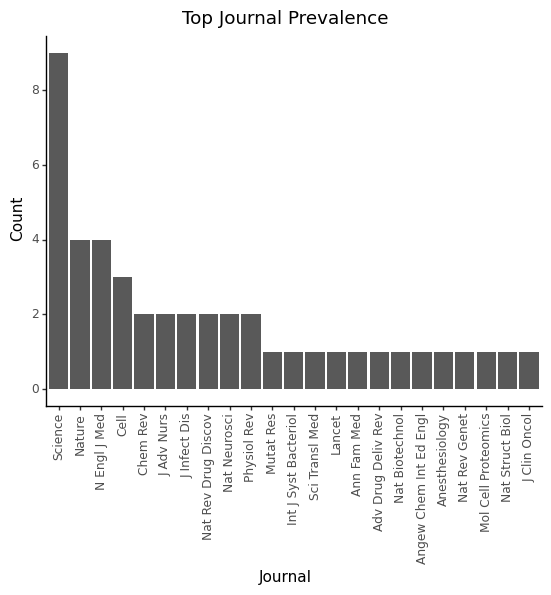

In [68]:
plot = ggplot(top_journal_df, aes(x='cat'))
plot += geom_bar(stat='count')
plot += theme_classic()
plot += theme(axis_text_x=element_text(rotation=90, hjust=.5))
plot += ylab('Count')
plot += xlab('Journal')
plot += scale_y_continuous(breaks=list(range(0,10, 2)))
plot += ggtitle('Top Journal Prevalence')

print(plot)

## Scratch

In [ ]:
heading1 = 'nanotechnology'
heading2 = 'microscopy'
percentile_data = load_percentile_data(heading1, heading2, base_dir='../viz_dataframes')
percentile_data.sort_values(by='nanotechnology-microscopy')

In [ ]:
plot = ggplot(percentile_data, aes(x=f'{heading1}_pagerank', y=f'{heading2}_pagerank',))
plot += geom_bin2d()
plot += scale_x_log10()
plot += scale_y_log10()
plot += ggtitle(f'{heading1} vs {heading2} pageranks')
plot += scale_fill_gradient(trans='log')
plot += theme_dark()

plot

In [ ]:
plot = ggplot(percentile_data, aes(x=f'{heading1}_pagerank', y=f'{heading2}_pagerank', 
              color=f'{heading1}-{heading2}'))
plot += geom_point()
plot += scale_x_log10()
plot += scale_y_log10()
plot += ggtitle(f'{heading1} vs {heading2} pageranks')
plot += scale_color_gradient2(low='red', mid='white', high='blue')
plot += theme_dark()

plot

In [ ]:
heading1 = 'immunochemistry'
heading2 = 'anatomy'
percentile_data = load_percentile_data(heading1, heading2, base_dir='../viz_dataframes')
percentile_data.sort_values(by='immunochemistry-anatomy')

In [ ]:
plot = ggplot(percentile_data, aes(x=f'{heading1}_pagerank', y=f'{heading2}_pagerank',))
plot += geom_bin2d()
plot += scale_x_log10()
plot += scale_y_log10()
plot += ggtitle(f'{heading1} vs {heading2} pageranks')
plot += scale_fill_gradient(trans='log')
plot += theme_dark()

plot

In [ ]:
plot = ggplot(percentile_data, aes(x=f'{heading1}_pagerank', y=f'{heading2}_pagerank', 
              color=f'{heading1}-{heading2}'))
plot += geom_point()
plot += scale_x_log10()
plot += scale_y_log10()
plot += ggtitle(f'{heading1} vs {heading2} pageranks')
plot += scale_color_gradient2(low='red', mid='white', high='blue')
plot += theme_dark()

plot

## Plotly plots

In [ ]:
heading1 = 'nanotechnology'
heading2 = 'microscopy'
percentile_data = load_percentile_data(heading1, heading2, base_dir='../viz_dataframes')
percentile_data.sort_values(by='nanotechnology-microscopy')

In [ ]:
plot = px.scatter(percentile_data, x=f'{heading1}_pagerank', y=f'{heading2}_pagerank', log_x=True, log_y=True,
                 opacity=1, color=f'{heading1}-{heading2}', color_continuous_scale='oxy', hover_data=['doi', 'title'],
                 title=f'Relative importance of papers in {heading1} and {heading2}',)
plot

In [ ]:
largest_dois = set(percentile_data.nlargest(5, 'nanotechnology-microscopy')['doi'])
percentile_data['top_five'] = percentile_data['doi'].isin(largest_dois)

In [ ]:
plot = px.scatter(percentile_data, x=f'{heading1}_pagerank', y=f'{heading2}_pagerank', log_x=True, log_y=True,
                 opacity=1, color='top_five', hover_data=['doi', 'title'],
                 title=f'Relative importance of papers in {heading1} and {heading2}',)
plot

In [ ]:
main_data = percentile_data[percentile_data['nanotechnology_pagerank'] > 0.000015]
smallest_dois = set(main_data.nsmallest(5, 'nanotechnology-microscopy')['doi'])
percentile_data['bot_five'] = percentile_data['doi'].isin(smallest_dois)

In [ ]:
plot = px.scatter(percentile_data, x=f'{heading1}_pagerank', y=f'{heading2}_pagerank', log_x=True, log_y=True,
                 opacity=1, color='bot_five', hover_data=['doi', 'title'],
                 title=f'Relative importance of papers in {heading1} and {heading2}',)
plot

In [ ]:
heading1 = 'immunochemistry'
heading2 = 'anatomy'
percentile_data = load_percentile_data(heading1, heading2, base_dir='../viz_dataframes')
percentile_data.sort_values(by=f'{heading1}-{heading2}')

In [ ]:
plot = px.scatter(percentile_data, x=f'{heading1}_pagerank', y=f'{heading2}_pagerank', log_x=True, log_y=True,
                  opacity=1, color=f'{heading1}-{heading2}', color_continuous_scale='oxy', hover_data=['doi', 'title'],
                  title=f'Relative importance of papers in {heading1} and {heading2}',)
plot

In [ ]:
heading1 = 'proteomics'
heading2 = 'metabolomics'
percentile_data = load_percentile_data(heading1, heading2, base_dir='../viz_dataframes')
percentile_data.sort_values(by=f'{heading1}-{heading2}')

In [ ]:
plot = px.scatter(percentile_data, x=f'{heading1}_pagerank', y=f'{heading2}_pagerank', log_x=True, log_y=True,
                 opacity=1, color=f'{heading1}-{heading2}', color_continuous_scale='oxy', hover_data=['doi', 'title'],
                 title=f'Relative importance of papers in {heading1} and {heading2}',)
plot

## Journal plots

In [ ]:
journal_data_files = glob('../viz_dataframes/journals/*')

results = {'percentile': [], 'journal': [], 'heading': []}

for file in journal_data_files:
    file_base = os.path.basename(file)
    file_base = os.path.splitext(file_base)[0]
    heading1, heading2 = file_base.split('-')
        
    with open(file, 'rb') as in_file:
        df = pkl.load(in_file)
        for _, row in df.iterrows():
            results['percentile'].append(row[f'{heading1}_percentile'])
            results['journal'].append(row[f'journal_title'])
            results['heading'].append(heading1)
            
            results['percentile'].append(row[f'{heading2}_percentile'])
            results['journal'].append(row[f'journal_title'])
            results['heading'].append(heading2)



In [ ]:
result_df = pd.DataFrame(results)

# Consolidate multiples
result_df = result_df.groupby(['journal', 'heading']).mean().reset_index()

result_df[result_df['journal'] == 'ACS Appl Mater Interfaces']

In [ ]:
plot = ggplot(result_df, aes(x='journal', y='heading', fill='percentile'))
plot += geom_tile()
plot

In [ ]:
frequent_headings = result_df.heading.value_counts()[result_df.heading.value_counts() > 250].index
frequent_headings

In [ ]:
frequent_df = result_df[result_df['heading'].isin(set(frequent_headings))]

In [ ]:
plot = ggplot(frequent_df, aes(x='journal', y='heading', fill='percentile'))
plot += geom_tile()
plot += theme(axis_text_x=element_text(rotation=90, hjust=1))
plot += ggtitle('Headings with many journals')
plot

In [ ]:
unmelted_df = frequent_df.pivot(index='journal', columns='heading', values='percentile')
# Remove journals not shared by all fields
unmelted_df = unmelted_df.dropna(axis='index')
unmelted_df 

In [ ]:
sns.set()

In [ ]:
%matplotlib inline
sns.clustermap(unmelted_df)

## Cluster by paper

In [ ]:
percentile_data_files = glob('../raw_dataframes/percentiles/*')

results = {'doi': [], 'percentile': [], 'heading': []}

for file in percentile_data_files:
    file_base = os.path.basename(file)
    file_base = os.path.splitext(file_base)[0]
    heading1, heading2 = file_base.split('-')
        
    with open(file, 'rb') as in_file:
        df = pkl.load(in_file)
        
        for _, row in df.iterrows():
            results['percentile'].append(row[f'{heading1}_percentile'])
            results['doi'].append(row['doi'])
            results['heading'].append(heading1)
            
            results['percentile'].append(row[f'{heading2}_percentile'])
            results['doi'].append(row['doi'])
            results['heading'].append(heading2)

In [ ]:
results_df = pd.DataFrame(results)
results_df

In [ ]:
# Some papers will have multiple percentile scores for the same heading as a result of
# being in multiple pairwise networks
mean_df = results_df.groupby(['heading', 'doi']).mean().reset_index()
mean_df

In [ ]:
compare_df = mean_df.pivot(index='heading', columns='doi', values='percentile').fillna(0)
compare_df

In [ ]:
compare_df.to_numpy().shape

In [ ]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(compare_df)

In [ ]:
sns.set_theme(style="white", palette=None)
plt.title("MeSH Terms Clustered by Single Field Mean Percentile")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode=None, labels=list(compare_df.index))
plt.xlabel("MeSH Heading")
# Prevent label truncation
plt.gcf().subplots_adjust(bottom=0.5)
#plt.show()
plt.savefig('../figures/heading_clusters.svg')

In [ ]:
print(model.n_leaves_)

In [ ]:
journal_data_files = glob('../viz_dataframes/journals/*')

results = {'percentile': [], 'journal': [], 'heading': []}

for file in journal_data_files:
    file_base = os.path.basename(file)
    file_base = os.path.splitext(file_base)[0]
    heading1, heading2 = file_base.split('-')
        
    with open(file, 'rb') as in_file:
        df = pkl.load(in_file)
        for _, row in df.iterrows():
            results['percentile'].append(row[f'{heading1}_percentile'])
            results['journal'].append(row[f'journal_title'])
            results['heading'].append(heading1)
            
            results['percentile'].append(row[f'{heading2}_percentile'])
            results['journal'].append(row[f'journal_title'])
            results['heading'].append(heading2)

In [ ]:
journal_df = pd.DataFrame(results)

# Consolidate multiples
journal_df = journal_df.groupby(['journal', 'heading']).mean().reset_index()

journal_df[journal_df['journal'] == 'ACS Appl Mater Interfaces']

journal_comparison_df = journal_df.pivot(index='journal', columns='heading', values='percentile')
journal_comparison_df

In [ ]:
c1 = ['immunochemistry', 'anatomy', 'histocytochemistry']
c1_df = journal_comparison_df.loc[:, c1].dropna()
c1_df

In [ ]:
sns.set()

In [ ]:
%matplotlib inline
g = sns.clustermap(c1_df)
g.savefig('../figures/immunochem_heatmap.svg')

In [ ]:
c2 = ['computational_biology', 'proteomics', 'biophysics', 'physiology']
c2_df = journal_comparison_df.loc[:, c2].dropna()
c2_df

In [ ]:
g = sns.clustermap(c2_df)
g.savefig('../figures/cb_heatmap.svg')

### Look for clusters of papers in a few fields to see how they fall along journal lines

In [ ]:
umap_model = umap.UMAP(random_state=42)

In [ ]:
percentile_data_files = glob('../raw_dataframes/percentiles/*')

results = {'doi': [], 'journal': []}

for file in percentile_data_files:
    file_base = os.path.basename(file)
    file_base = os.path.splitext(file_base)[0]
    heading1, heading2 = file_base.split('-')
        
    with open(file, 'rb') as in_file:
        df = pkl.load(in_file)
        
        for _, row in df.iterrows():
            results['journal'].append(row['journal'])
            results['doi'].append(row['doi'])
            
            results['journal'].append(row['journal'])
            results['doi'].append(row['doi'])


In [ ]:
doi_df = pd.DataFrame(results).drop_duplicates()
doi_to_journal = dict(zip(doi_df.doi, doi_df.journal))

In [ ]:
compare_df

In [ ]:
multi_field_df = compare_df.loc[:, (compare_df!=0).sum(axis=0) > 1]
random_subset_df = multi_field_df.sample(n=75000, random_state=42, axis='columns')
random_subset_df

In [ ]:
(compare_df!=0).sum(axis=0).value_counts()

In [ ]:
%%time
umap_data = umap_model.fit_transform(random_subset_df.T)
umap_data

In [ ]:
umap_data.shape

In [ ]:
random_umap_df = pd.DataFrame(umap_data, columns=['UMAP1', 'UMAP2'])
random_umap_df['doi'] =random_subset_df.columns
random_umap_df['journal'] = random_umap_df['doi'].map(doi_to_journal)
random_umap_df['num_fields'] = (random_subset_df!=0).sum(axis=0).values
random_umap_df

In [ ]:
print(random_umap_df.journal.value_counts()[:100])

In [ ]:
plot = ggplot(random_umap_df, aes(x='UMAP1', y='UMAP2', color='journal'))
plot += geom_point(alpha=1)
plot += scale_color_discrete(guide=False)
plot

In [ ]:
plot = ggplot(random_umap_df, aes(x='UMAP1', y='UMAP2', color='num_fields'))
plot += geom_point(alpha=1)
plot

In [ ]:
highlight_journals = ["Genet Epidemiol", "Genome Res", "Am J Hum Genet", "Bioinformatics", "Nature"]
viz_df = random_umap_df
viz_df['journal'] = np.where(viz_df['journal'].isin(highlight_journals), viz_df['journal'], 'other')
plot = ggplot(viz_df, aes(x='UMAP1', y='UMAP2', color='journal'))
plot += geom_point(viz_df[viz_df['journal'] == 'other'], alpha=.005, color='grey')
plot += geom_point(viz_df[viz_df['journal'].isin(highlight_journals)], alpha=1)
plot

In [ ]:
viz_df = random_umap_df
viz_df['journal'] = np.where(viz_df['journal'].isin(highlight_journals), viz_df['journal'], 'other')
plot = ggplot(viz_df, aes(x='UMAP1', y='UMAP2', color='journal'))
#plot += geom_point(viz_df[viz_df['journal'] == 'other'], alpha=.005, color='grey')
plot += geom_point(viz_df[viz_df['journal'].isin(highlight_journals)], alpha=1)
plot